In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import numpy as np

In [9]:
OD_data = pd.read_csv('OD_with_distances.csv')
OD_data

,Orig,Dest,Orig_station,Dest_station,total_trips,distance,orig_pop,dest_jobs
0,0,1,Baker Street,Marylebone,35,416.586050,24812,12652
1,0,2,Baker Street,Regent's Park,0,734.173636,24812,3965
2,0,3,Baker Street,Charing Cross,290,3090.591326,24812,17958
3,0,4,Baker Street,Embankment,73,3270.094744,24812,21813
4,0,5,Baker Street,Picadilly Circus,744,2401.301481,24812,31758
...,...,...,...,...,...,...,...,...
69955,276,271,Vauxhall,Walthamstow Central,1043,17327.045800,32662,20687
69956,276,272,Vauxhall,Brixton,1437,2764.159432,32662,24288
69957,276,273,Vauxhall,Highbury & Islington,1232,8390.189076,32662,34594
69958,276,274,Vauxhall,Seven Sisters,761,13231.341960,32662,28290


Text(0, 0.5, 'Total Flows')

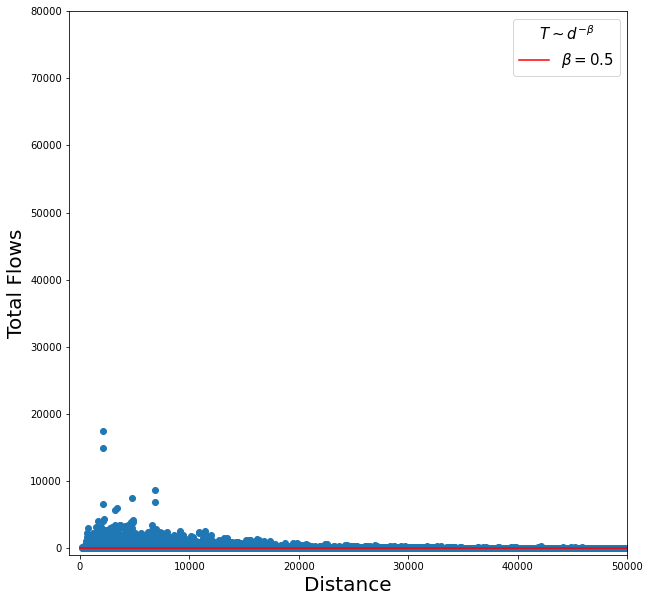

In [34]:
#first plot the Total commuter flows denoted by T against distance denoted by d
#and then fit a model line T ~ d^-beta with beta=2

#set the base axis
fig, ax = plt.subplots(figsize=(10,10))

#scatter plot
ax.scatter(x = OD_data["distance"], y = OD_data["total_trips"])
#line plot
line = np.arange(0.0002, 50_000, 0.1)
ax.plot(line, line**-0.5, color ="r", label = "$\\beta=0.5$")
#add a legend
ax.legend(title = "$T \\sim d^{-\\beta}$", fontsize = 15, title_fontsize=15)
#axis limits
ax.set_xlim([-1000,50000])
ax.set_ylim([-1000, 80000])
#set the labels
ax.set_xlabel("Distance", fontsize = 20)
ax.set_ylabel("Total Flows", fontsize = 20)

Text(0, 0.5, 'log(total_trips)')

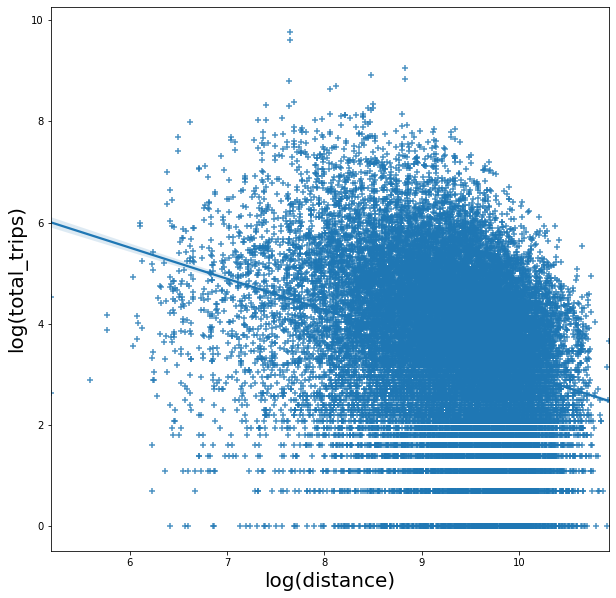

In [13]:
#subset the dataframe to the flows we want
OD_flows = OD_data[["total_trips", "distance"]]
#remove all 0 values (logarithms can't deal with 0 values)
OD_flows = OD_flows[(OD_flows!=0).all(1)]

#extract the x and y converting to log
x = np.log(OD_flows["distance"])
y = np.log(OD_flows["total_trips"])

#create the subplot
fig, ax = plt.subplots(figsize = (10,10))
#plot the results along with the line of best fit
sns.regplot(x=x, y=y, marker="+", ax=ax)
ax.set_xlabel("log(distance)", fontsize = 20)
ax.set_ylabel("log(total_trips)", fontsize = 20)

In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#take the variables and produce logarithms of them
y_variables = ["total_trips"]
x_variables = ["orig_pop", "dest_jobs", "distance"]
log_x_vars = []
for x in x_variables:
    OD_data[f"log_{x}"] = np.log(OD_data[x])
    log_x_vars.append(f"log_{x}")
log_y_vars = []
for y in y_variables:
    OD_data[f"log_{y}"] = np.log(OD_data[y])
    log_y_vars.append(f"log_{y}")
#create the formula
formula = 'log_total_trips ~ log_orig_pop + log_dest_jobs + log_distance'

#run the regression
uncosim = smf.glm(formula = formula, data=OD_data, family=sm.families.Poisson()).fit()

D:\anaconda3\envs\urbsim\lib\site-packages\statsmodels\genmod\families\family.py:428: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
D:\anaconda3\envs\urbsim\lib\site-packages\statsmodels\genmod\families\family.py:429: RuntimeWarning: invalid value encountered in subtract
  resid_dev = endog * np.log(endog_mu) - (endog - mu)


ValueError: The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.

In [19]:
df = df[['total_trips', 'distance', 'orig_pop','dest_jobs']]

NameError: name 'df' is not defined

In [21]:
df = pd.DataFrame(OD_data)

In [23]:
OD_subdata=df[df.total_trips > 0]

In [24]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#take the variables and produce logarithms of them
y_variables = ["total_trips"]
x_variables = ["orig_pop", "dest_jobs", "distance"]
log_x_vars = []
for x in x_variables:
    OD_subdata[f"log_{x}"] = np.log(OD_data[x])
    log_x_vars.append(f"log_{x}")
log_y_vars = []
for y in y_variables:
    OD_subdata[f"log_{y}"] = np.log(OD_data[y])
    log_y_vars.append(f"log_{y}")
#create the formula
formula = 'log_total_trips ~ log_orig_pop + log_dest_jobs + log_distance'

#run the regression
uncosim = smf.glm(formula = formula, data=OD_subdata, family=sm.families.Poisson()).fit()

D:\anaconda3\envs\urbsim\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [25]:
print(uncosim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        log_total_trips   No. Observations:                28865
Model:                            GLM   Df Residuals:                    28861
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -51255.
Date:                Tue, 27 Apr 2021   Deviance:                       15793.
Time:                        00:13:34   Pearson chi2:                 1.32e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.5168      0.070     -7.374

In [28]:
K = uncosim.params[0]
alpha = uncosim.params[1]
gamma = uncosim.params[2]
beta = -uncosim.params[3]

#now plug everything back into the Equation 6 model ... 
#be careful with the negative signing of the parameter beta
OD_subdata["unconstrainedEst2"] = np.exp(K + alpha*OD_subdata["log_orig_pop"] + gamma*OD_subdata["log_dest_jobs"] -
                                      beta*OD_subdata["log_distance"])

#or we can just extract the results from the actual poisson regression and apply them to the data
predictions = uncosim.get_prediction()
predictions_summary_frame = predictions.summary_frame()
OD_subdata["fitted"] = predictions_summary_frame["mean"]

D:\anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
#round the numbers so that we don't get a half of a person
OD_subdata["unconstrainedEst2"] = round(OD_subdata["unconstrainedEst2"], 0)
#convert to integers
OD_subdata["unconstrainedEst2"] = OD_subdata["unconstrainedEst2"].astype(int)
#check that the sum of these estimates make sense
sum(OD_subdata["unconstrainedEst2"])

D:\anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


100533

In [32]:
import scipy.stats

def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

CalcRSqaured(OD_subdata["total_trips"], OD_subdata["unconstrainedEst2"])

0.17473657627118688

In [33]:
from math import sqrt

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

CalcRMSE(OD_subdata["total_trips"], OD_subdata["unconstrainedEst2"])

294.895